In [1]:
from PIL import Image
import numpy as np
import os

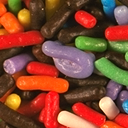

In [2]:
demo = Image.open("data/Vistex/Vistex/c005_005.png")
demo

# Isolando canais de cores

In [3]:
def get_channel(img: Image, channel: int, mode: str = "RGB") -> Image:

    img_array = np.asarray(img)
    desired_channel = img_array[:,:,channel]

    if mode == "RGB":
        zero = np.zeros(shape=img_array.shape)
        zero[:,:,channel] = img_array[:,:,channel]
        final_image = zero
    elif mode == "L":
        final_image = desired_channel
    else:
        raise Exception("Using not supported image mode.")

    # Converter para uint8 para preservar a escala de 0 a 255 
    return Image.fromarray(np.uint8(final_image), mode=mode)



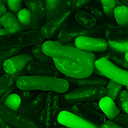

In [4]:
get_channel(demo, 1, mode="RGB")

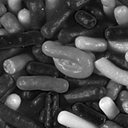

In [5]:
get_channel(demo, 1, mode="L")

# Conversão para escala de cinza

In [6]:
def luminance_gray_scale(img: Image) -> Image:

    img_array = np.asarray(img)
    output_array = np.zeros(shape=img_array.shape[:2])

    # Razão de contribuição dos canais: 0.21R + 0.71G + 0.07B
    output_array = 0.21 * img_array[:,:,0] + 0.71 * img_array[:,:,1] + 0.07 * img_array[:,:,2]

    return Image.fromarray(np.uint8(output_array))

def mean_gray_scale(img: Image) -> Image:
    
    img_array = np.asarray(img)
    output_array = np.zeros(shape=img_array.shape[:2])

    output_array = 0.33 * (img_array[:,:,0] + img_array[:,:,1] + img_array[:,:,2])

    return Image.fromarray(np.uint8(output_array))

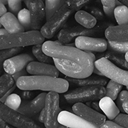

In [7]:
luminance_gray_scale(demo)

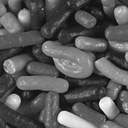

In [8]:
# conversão nativa do PIL
demo.convert('L')

# Geração de histograma a partir de imagem em escala de cinza

In [9]:
def histogram_from_grayscale(img: Image) -> np.array:

    histogram = np.zeros(256)
    # Reshape para facilitar iteração
    img_array = np.asarray(img).reshape(-1)

    for pixel in img_array:
        histogram[pixel] += 1

    return histogram


In [10]:
img = luminance_gray_scale(demo)

In [11]:
histogram_from_grayscale(img)

array([  0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   3.,   3.,   4.,
         7.,  12.,  19.,  17.,  30.,  43.,  76.,  80., 155., 159., 115.,
       150., 144., 127., 122., 128., 151., 132., 127., 117., 144., 126.,
       113., 126., 126., 136., 152., 136., 128., 110., 140., 144., 135.,
       177., 190., 200., 188., 167., 209., 186., 167., 172., 214., 198.,
       153., 149., 148., 116., 126., 117., 137., 140., 154., 189., 197.,
       184., 217., 250., 185., 172., 164., 165., 167., 145., 153., 140.,
       108., 112., 110., 110., 108.,  97., 105.,  73.,  81.,  73.,  74.,
        80.,  91.,  64.,  64.,  69.,  61.,  82.,  67.,  73.,  56.,  89.,
        62.,  67.,  70.,  66.,  67.,  82.,  76.,  74.,  69.,  74.,  81.,
        90.,  92.,  92.,  76., 106., 123.,  94., 107.,  95.,  88.,  97.,
        89.,  72.,  94.,  88.,  72.,  80.,  98.,  71.,  67.,  85.,  72.,
        79.,  71.,  56.,  60.,  67.,  45.,  63.,  60.,  48.,  62.,  54.,
        58.,  43.,  36.,  48.,  37.,  34.,  50.,  3

# Geração de histograma para imagens RGB

In [12]:
def histogram_from_rgb(img: Image) -> np.array:

    r_channel = get_channel(img, 0, mode="L")
    g_channel = get_channel(img, 1, mode="L")
    b_channel = get_channel(img, 2, mode="L")

    r_hist = histogram_from_grayscale(r_channel)
    g_hist = histogram_from_grayscale(g_channel)
    b_hist = histogram_from_grayscale(b_channel)

    return np.concatenate([r_hist, g_hist, b_hist])

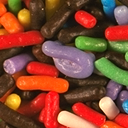

In [13]:
demo

In [14]:
rgb_hist = histogram_from_rgb(demo)
rgb_hist

array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
       0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 4.000e+00,
       1.000e+00, 5.000e+00, 5.000e+00, 1.000e+01, 3.000e+00, 1.000e+01,
       1.000e+01, 1.200e+01, 2.000e+01, 1.800e+01, 3.300e+01, 4.200e+01,
       8.700e+01, 9.600e+01, 5.400e+01, 1.050e+02, 8.000e+01, 9.600e+01,
       6.800e+01, 6.900e+01, 5.200e+01, 7.000e+01, 1.030e+02, 6.600e+01,
       6.700e+01, 7.300e+01, 1.140e+02, 8.600e+01, 7.000e+01, 7.000e+01,
       6.300e+01, 1.050e+02, 9.400e+01, 8.600e+01, 9.000e+01, 7.200e+01,
       1.220e+02, 9.000e+01, 9.200e+01, 6.500e+01, 9.700e+01, 1.030e+02,
       8.800e+01, 8.000e+01, 6.200e+01, 9.300e+01, 1.140e+02, 9.000e+01,
       7.300e+01, 8.300e+01, 8.500e+01, 1.170e+02, 1.000e+02, 8.800e+01,
       1.060e+02, 1.130e+02, 1.470e+02, 1.120e+02, 1.230e+02, 1.350e+02,
       1.120e+02, 1.640e+02, 1.130e+02, 1.360e+02, 1.360e+02, 1.130e+02,
       1.500e+02, 1.370e+02, 1.090e+02, 8.400e+01, 

In [15]:
rgb_hist.shape

(768,)

# Determinando imagens mais similares

In [25]:
from tqdm import tqdm

PATH = "data/Vistex/Vistex/"

def get_pdf(img: Image, rgb: bool = False) -> np.array:

    if rgb:
        img_histogram = histogram_from_rgb(img)
    else:
        gray_scale_img = luminance_gray_scale(img)
        img_histogram = histogram_from_grayscale(gray_scale_img)

    n_pixels = img.size[0] * img.size[1]
    img_pdf = (1/n_pixels) * img_histogram

    return img_pdf


def k_similar(k: int, target: Image, metric, rgb: bool = False):

    target_pdf = get_pdf(target, rgb)
    images = os.listdir("data/Vistex/Vistex")
    distances = np.zeros(len(images))

    for i, img in tqdm(enumerate(images), desc="- Computing metric"):

        img = Image.open(PATH + img)
        img_pdf = get_pdf(img, rgb)

        distances[i] = metric(target_pdf, img_pdf)

    sorted_indexes = distances.argsort()

    return [images[i] for i in sorted_indexes[:k]]


In [17]:
def euclidean_distance(a, b):

    return np.square(a - b).sum()


def square_chi(a, b):

    return 0.5 * (np.square(a - b) / (a + b)).sum()

In [18]:
# usando escala de cinza apenas
similar = k_similar(5, demo, euclidean_distance, rgb=False)

- Computing metric: 864it [00:10, 83.17it/s]


In [19]:
similar

['c005_005.png',
 'c005_013.png',
 'c005_001.png',
 'c021_016.png',
 'c017_011.png']

In [26]:
# usando rgb
similar = k_similar(5, demo, euclidean_distance, rgb=True)


- Computing metric: 864it [00:27, 31.85it/s]


In [27]:
similar

['c005_005.png',
 'c005_013.png',
 'c005_007.png',
 'c005_006.png',
 'c005_010.png']

# KNN simples

In [20]:
def get_class_from_string(file_name: str) -> int:

    return int(file_name.split("_")[0][1:])

In [21]:
def knn_classifier(votes: list) -> int:
    # Apenas permitir classifcações para K's ímpares
    assert len(votes) % 2 != 0

    max_class = max(votes) + 1
    votes_count = np.zeros(max_class)

    for vote in votes:
        votes_count[vote] += 1

    return votes_count.argmax()

In [22]:
votes = [get_class_from_string(sim) for sim in similar]

In [23]:
knn_classifier(votes)

5